In [58]:
%matplotlib inline
import everest
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.constants import R_sun, R_earth

DEBUG [matplotlib.pyplot.switch_backend()]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [68]:
b = 0.60
inc = 88.3

b / np.cos(np.radians(inc))

20.225007192640714

In [69]:
# Mann 2016: 210490365
# Mann 2017: 211990866, 211913977, 211970147, 211822797, 211969807, 211901114 (not in NEA?), 211916756
# Mann 2018: 247589423
# Rizzuto 2018: 211964830 (C16 not in EVEREST)

epic= [210490365, 211990866, 211913977, 211970147, 211822797,
       211969807, 211916756, 247589423, 247589423, 247589423]
per = [3.484552, 1.673833, 14.677286, 9.915615, 21.169619, 
       1.974238, 10.134016, 7.975292, 17.307137, 25.575065]
rp  = [0.1065, 0.0269, 0.026134, 0.0170, 0.0336, 
       0.0365, 0.08530, 0.0137, 0.0401, 0.0201]
t0  = [2457062.57935, 2457140.72062, 2457152.68135, 2457139.65518, 2457123.23803, 
       2457140.38117, 2457150.87837, 2457817.75631, 2457812.71770, 2457780.81164]
inc = [88.3, 85.1, 89.4, 89.0, 89.73, 
       88.00, 89.4, 89.3, 89.6, 89.4]
ecc = [0.27, 0.24, 0.10, 0.10, 0.18, 
       0.09, 0.16, 0.10, 0.13, 0.14]
w   = [62.0, 29, 0.00, -1.00, 0.0, 
       6.24, -2.00, 12, 24, 2]
a   = [20.225, 6.2, 32.5, 25.3, 46.7, 
       11.0, 18.27, 23.1, 39.0, 50.7]
mstar = [0.294, 1.23, 0.80, 0.77, 0.663459,
         0.426533, 0.44, 0.74, 0.74, 0.74]
mstar_err = [0.021, 0.02, 0.06, 0.06, 0.066346,
             0.06, 0.01, 0.02, 0.02, 0.02]
rstar = [0.295, 1.22, 0.73, 0.71, 0.571699, 
         0.492279, 0.42, 0.66, 0.66, 0.66]
rstar_err = [0.020, 0.02, 0.03, 0.03, 0.02, 
             0.03, 0.01, 0.02, 0.02, 0.02]

table = Table([epic, per, rp, t0, inc, ecc, w, a, mstar, mstar_err, rstar, rstar_err], 
              names="EPIC per rp t0 inc ecc w a mstar mstar_err rstar rstar_err".split())

In [71]:
# for i in range(len(table)):
#     star = everest.Everest(table['EPIC'][i])
#     np.save("data/{0}".format(table['EPIC'][i]), np.vstack([star.time, star.flux]))

In [72]:
table.write('data/zeit.csv')

WARNING [astropy._showwarning()]: AstropyDeprecationWarning: data/zeit.csv already exists. Automatically overwriting ASCII files is deprecated. Use the argument 'overwrite=True' in the future.


In [ ]:
table

In [41]:
dressing_stars = Table.read('data/dressing2013_stars.vot', format='votable')
dressing_planets = Table.read('data/dressing2013_planets.vot', format='votable')

WARNING [astropy._showwarning()]: W27: data/dressing2013_stars.vot:58:2: W27: COOSYS deprecated in VOTable 1.2
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:83:4: W03: Implicitly generating an ID from a name 'R*' -> 'R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:86:4: W03: Implicitly generating an ID from a name 'E_R*' -> 'E_R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:89:4: W03: Implicitly generating an ID from a name 'e_R*' -> 'e_R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:92:4: W03: Implicitly generating an ID from a name 'M*' -> 'M_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:95:4: W03: Implicitly generating an ID from a name 'E_M*' -> 'E_M_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:98:4: W03: Implicitly generating an ID from a name 'e_M*' -> 'e_M_'
WARNING [astropy._showwarning()]: W50: data/dressing2013_stars.vot:101:4: W50: Invalid 

WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:69:4: W03: Implicitly generating an ID from a name 'a/r*' -> 'a_r_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:72:4: W03: Implicitly generating an ID from a name 'rp/r*' -> 'rp_r_'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:87:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:90:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:93:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:99:4: W03: Implicitly generating an ID from a name 'R*' -> 'R_'


In [44]:
from astropy.table import join

dressing = join(dressing_stars, dressing_planets, keys='KIC')

WARNING [astropy._showwarning()]: MergeConflictWarning: In merged column 'KIC' the 'description' attribute does not match (Kepler Input Catalog ID (V/133) != Kepler identifier (V/133)).  Using Kepler identifier (V/133) for merged output
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'name' types <class 'str'> and <class 'str'>, choosing name='J/ApJ/767/95/table2'
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'ID' types <class 'str'> and <class 'str'>, choosing ID='J_ApJ_767_95_table2'
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'description' types <class 'str'> and <class 'str'>, choosing description='Revised properties for planet candidates orbiting small star'


In [51]:
dressing.write('data/dressing_joined.csv')

[[0.31], [0.95]]
[[0.2], [0.2]]
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Writing TrueType font.
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.backends.backend_pdf.fontName()]: Assigning font /b'F1' = '/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG [matplotlib.backends.backend_pdf.writeFonts()]: Embedding font /Users/bmm

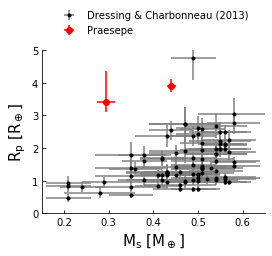

In [161]:
plt.figure(figsize=(4, 3))
plt.errorbar(dressing["M_"], dressing['Rp'], xerr=dressing['E_M_'], yerr=dressing['e_Rp'], 
             fmt='.', color='k', ecolor='gray', label='Dressing & Charbonneau (2013)')

#yerrs = [[[0.31, 0.95]], [[0.2, 0.2]]]
yerrs = [[[0.31], [0.95]], [[0.2], [0.2]]]
label = None
for ind, i in enumerate([0, 6]):
    print(yerrs[ind])
    if ind == 1: 
        label = 'Praesepe'
    plt.errorbar(table['mstar'][i], table['rp'][i]*(table['rstar'][i]*R_sun)/R_earth, 
                 xerr=table['mstar_err'][i], yerr=yerrs[ind],
                 fmt='o', color='r', ecolor='r', label=label)

plt.ylim([0, 5])
plt.xlim([0.15, 0.65])
fs = 15
plt.xlabel('$\\rm M_s$ [M$_\oplus$]', fontsize=fs)
plt.ylabel('$\\rm R_p$ [R$_\oplus$]', fontsize=fs)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3)).get_frame().set_alpha(0)
for s in ['right', 'top']:
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/motivation.pdf', bbox_inches='tight')

In [83]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
coord = SkyCoord(ra=dressing['_RA'], dec=dressing['_DE'], unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.arcmin)
height = u.Quantity(0.1, u.arcmin)

rows = []
for i in range(len(dressing)): 
    if dressing['M_'][i] < 0.6:
        r = Gaia.query_object_async(coordinate=coord[i], width=width, height=height)
        min_dist = np.argmin(r['dist'])
        rows.append(r[min_dist])

Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query finished.
Query fi

In [88]:
gaia_dressing = Table(rows=rows, names=rows[0].colnames)

In [108]:
# coord = [SkyCoord.from_name("EPIC {0}".format(kic)) for kic in [210490365, 211916756]]
coord = SkyCoord(ra=['04h13m05.62s', '08h37m27.06s'], dec=['+15d14m51.9s', '+18d58m36.1s'], frame='icrs')
width = u.Quantity(0.1, u.arcmin)
height = u.Quantity(0.1, u.arcmin)

rows = []
for i in range(len(coord)): 
    r = Gaia.query_object_async(coordinate=coord[i], width=width, height=height)
    min_dist = np.argmin(r['dist'])
    rows.append(r[min_dist])
gaia_zeit = Table(rows=rows, names=rows[0].colnames)

WARNING [astropy._showwarning()]: W35: None:5:0: W35: 'value' attribute required for INFO elements
WARNING [astropy._showwarning()]: W35: None:6:0: W35: 'value' attribute required for INFO elements
WARNING [astropy._showwarning()]: W35: None:7:0: W35: 'value' attribute required for INFO elements
WARNING [astropy._showwarning()]: W35: None:8:0: W35: 'value' attribute required for INFO elements
WARNING [astropy._showwarning()]: W35: None:10:0: W35: 'value' attribute required for INFO elements
WARNING [astropy._showwarning()]: W27: None:11:0: W27: COOSYS deprecated in VOTable 1.2
WARNING [astropy._showwarning()]: W06: None:48:0: W06: Invalid UCD 'arith.ratio': Secondary word 'arith.ratio' is not valid as a primary word
WARNING [astropy._showwarning()]: W50: None:51:0: W50: Invalid unit string 'mas.yr**-1'
WARNING [astropy._showwarning()]: W50: None:54:0: W50: Invalid unit string 'mas.yr**-1'
WARNING [astropy._showwarning()]: W50: None:57:0: W50: Invalid unit string 'mas.yr**-1'
WARNING [a

Query finished.
Query finished.


/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [111]:
dressing_g = gaia_dressing['phot_g_mean_mag']
dressing_d_pc = 1/(gaia_dressing['parallax'] * 1e-3)
dressing_G = dressing_g - 5 * (np.log10(dressing_d_pc) + 1)
dressing_bp = gaia_dressing['phot_bp_mean_mag']
dressing_rp = gaia_dressing['phot_rp_mean_mag']

zeit_g = gaia_zeit['phot_g_mean_mag']
zeit_d_pc = 1/(gaia_zeit['parallax'] * 1e-3)
zeit_G = zeit_g - 5 * (np.log10(zeit_d_pc) + 1)
zeit_bp = gaia_zeit['phot_bp_mean_mag']
zeit_rp = gaia_zeit['phot_rp_mean_mag']

[-2.44294836 -2.37127796 -2.29960757 -2.22793717 -2.15626677 -2.08459638
 -2.01292598 -1.94125558 -1.86958519 -1.79791479 -1.72624439 -1.65457399
 -1.5829036  -1.5112332  -1.4395628  -1.36789241 -1.29622201 -1.22455161
 -1.15288122 -1.08121082 -1.00954042 -0.93787002 -0.86619963 -0.79452923
 -0.72285883 -0.65118844 -0.57951804 -0.50784764 -0.43617725 -0.36450685
 -0.29283645 -0.22116606 -0.14949566 -0.07782526 -0.00615486  0.06551553
  0.13718593  0.20885633  0.28052672  0.35219712  0.42386752  0.49553791
  0.56720831  0.63887871  0.7105491   0.7822195   0.8538899   0.9255603
  0.99723069  1.06890109]
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


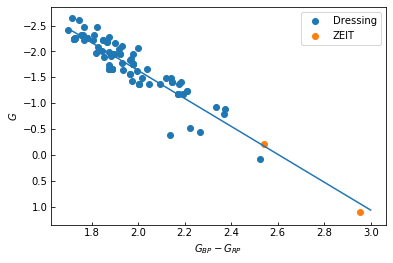

In [115]:
mask = ~np.isnan(dressing_bp) & ~np.isnan(dressing_rp) & ~np.isnan(dressing_G)
poly = np.polyfit(dressing_bp[mask]-dressing_rp[mask], dressing_G[mask], 1)
x = np.linspace(1.7, 3.0)
fit = np.polyval(poly, x)

plt.scatter(dressing_bp-dressing_rp, dressing_G, label='Dressing')

plt.scatter(zeit_bp-zeit_rp, zeit_G, label='ZEIT')

plt.plot(x, fit)

plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$')
plt.legend()
plt.ylabel('$G$')
plt.show()

In [167]:
from astropy.table import Column

In [169]:
gaia_dressing_kics = []
for i in range(len(dressing)): 
    if dressing['M_'][i] < 0.6:
        gaia_dressing_kics.append(dressing['KIC'][i])

gaia_dressing.add_column(Column(gaia_dressing_kics, 'KIC'))

In [171]:
gaia_dressing.write('data/gaia_dressing.csv')